In [1]:
import zipfile
import requests
import numpy as np
print('numpy '+ np.__version__)
import pandas as pd
print ('pandas '+ pd.__version__)
import seaborn as sns
print('seaborn '+ sns.__version__)
import matplotlib.pyplot as plt

%matplotlib inline

numpy 1.10.4
pandas 0.17.1
seaborn 0.6.0


C:\Users\btq\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Station data
First, I can pull the station data from the citbike website. This is actually the status of the stations currently, so there may be stations online now that were not when that data was pulled.
I will request the json station data, and convert it to a pandas data frame.

In [2]:
#Station information
station_status_url = 'http://www.citibikenyc.com/stations/json'
resp=requests.get(station_status_url)
resp.json().keys()

[u'executionTime', u'stationBeanList']

In [3]:
resp.json()['stationBeanList'][0]

{u'altitude': u'',
 u'availableBikes': 8,
 u'availableDocks': 31,
 u'city': u'',
 u'id': 72,
 u'landMark': u'',
 u'lastCommunicationTime': u'2016-02-23 11:53:58 AM',
 u'latitude': 40.76727216,
 u'location': u'',
 u'longitude': -73.99392888,
 u'postalCode': u'',
 u'stAddress1': u'W 52 St & 11 Ave',
 u'stAddress2': u'',
 u'stationName': u'W 52 St & 11 Ave',
 u'statusKey': 1,
 u'statusValue': u'In Service',
 u'testStation': False,
 u'totalDocks': 39}

In [4]:
station_info = pd.DataFrame(resp.json()['stationBeanList'])
station_info.head(2)

,altitude,availableBikes,availableDocks,city,id,landMark,lastCommunicationTime,latitude,location,longitude,postalCode,stAddress1,stAddress2,stationName,statusKey,statusValue,testStation,totalDocks
0,,8,31,,72,,2016-02-23 11:53:58 AM,40.767272,,-73.993929,,W 52 St & 11 Ave,,W 52 St & 11 Ave,1,In Service,False,39
1,,16,17,,79,,2016-02-23 11:53:01 AM,40.719116,,-74.006667,,Franklin St & W Broadway,,Franklin St & W Broadway,1,In Service,False,33


In [9]:
filename = 'data/201501-citibike-tripdata.zip'
with zipfile.ZipFile(filename) as myzip:
    with myzip.open(myzip.namelist()[0]) as myfile:
        cb_trip_df = pd.read_csv(myfile)

runit = 0
if runit == 1:
    filenames = ['data/201402-citibike-tripdata.zip','data/201403-citibike-tripdata.zip','data/201404-citibike-tripdata.zip','data/201405-citibike-tripdata.zip',
                 'data/201406-citibike-tripdata.zip','data/201407-citibike-tripdata.zip','data/201408-citibike-tripdata.zip','data/201409-citibike-tripdata.zip',
                 'data/201410-citibike-tripdata.zip','data/201411-citibike-tripdata.zip','data/201412-citibike-tripdata.zip','data/201501-citibike-tripdata.zip',
                 'data/201502-citibike-tripdata.zip','data/201503-citibike-tripdata.zip','data/201504-citibike-tripdata.zip','data/201505-citibike-tripdata.zip',
                 'data/201506-citibike-tripdata.zip','data/201507-citibike-tripdata.zip','data/201508-citibike-tripdata.zip','data/201509-citibike-tripdata.zip',
                 'data/201510-citibike-tripdata.zip','data/201511-citibike-tripdata.zip','data/201512-citibike-tripdata.zip']
    for filen in filenames:
        print filen
        with zipfile.ZipFile(filen) as myzip:
            with myzip.open(myzip.namelist()[0]) as myfile:
                temp_df = pd.read_csv(myfile)
                cb_trip_df = cb_trip_df.append(temp_df, ignore_index=True)

cb_trip_df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1


In [10]:
cb_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285552 entries, 0 to 285551
Data columns (total 15 columns):
tripduration               285552 non-null int64
starttime                  285552 non-null object
stoptime                   285552 non-null object
start station id           285552 non-null int64
start station name         285552 non-null object
start station latitude     285552 non-null float64
start station longitude    285552 non-null float64
end station id             285552 non-null int64
end station name           285552 non-null object
end station latitude       285552 non-null float64
end station longitude      285552 non-null float64
bikeid                     285552 non-null int64
usertype                   285552 non-null object
birth year                 279924 non-null float64
gender                     285552 non-null int64
dtypes: float64(5), int64(5), object(5)
memory usage: 34.9+ MB


In [14]:
cb_trip_df.tail(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,startyear,starthour,startminute,startday,stophour,stopminute,stopday,weekday,userage
285550,725,2015-01-31 23:58:00,2015-02-01 00:10:00,435,W 21 St & 6 Ave,40.741740,-73.994156,368,Carmine St & 6 Ave,40.730386,...,1,2015,23,58,31,0,10,1,2015,58
285551,892,2015-01-31 23:59:00,2015-02-01 00:14:00,504,1 Ave & E 15 St,40.732219,-73.981656,295,Pike St & E Broadway,40.714067,...,1,2015,23,59,31,0,14,1,2015,41


I am going to do a bunch of datetime converting and add columns with more specific and useful info. These will be:
* Start Hour
* Start Minute
* Start Year
* Stop Hour
* Stop Minute
* Weekday
* User Age

In [12]:
# Convert to datetime timestamps
cb_trip_df['starttime']=pd.to_datetime(cb_trip_df['starttime'],infer_datetime_format=True)
cb_trip_df['stoptime']=pd.to_datetime(cb_trip_df['stoptime'],infer_datetime_format=True)
#cb_trip_df['birth year']=pd.to_datetime(cb_trip_df['birth year'],infer_datetime_format=True)

In [13]:
cb_trip_df['startyear']=cb_trip_df['starttime'].apply(lambda x: x.year)
cb_trip_df['starthour']=cb_trip_df['starttime'].apply(lambda x: x.hour)
cb_trip_df['startminute']=cb_trip_df['starttime'].apply(lambda x: x.minute)
cb_trip_df['startday']=cb_trip_df['starttime'].apply(lambda x: x.day)
cb_trip_df['stophour']=cb_trip_df['stoptime'].apply(lambda x: x.hour)
cb_trip_df['stopminute']=cb_trip_df['stoptime'].apply(lambda x: x.minute)
cb_trip_df['stopday']=cb_trip_df['stoptime'].apply(lambda x: x.day)
cb_trip_df['weekday']=cb_trip_df['starttime'].apply(lambda x: x.year)
cb_trip_df['userage']=cb_trip_df['startyear']-cb_trip_df['birth year']
cb_trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285552 entries, 0 to 285551
Data columns (total 24 columns):
tripduration               285552 non-null int64
starttime                  285552 non-null datetime64[ns]
stoptime                   285552 non-null datetime64[ns]
start station id           285552 non-null int64
start station name         285552 non-null object
start station latitude     285552 non-null float64
start station longitude    285552 non-null float64
end station id             285552 non-null int64
end station name           285552 non-null object
end station latitude       285552 non-null float64
end station longitude      285552 non-null float64
bikeid                     285552 non-null int64
usertype                   285552 non-null object
birth year                 279924 non-null float64
gender                     285552 non-null int64
startyear                  285552 non-null int64
starthour                  285552 non-null int64
startminute              

In [15]:
cb_trip_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,startyear,starthour,startminute,startday,stophour,stopminute,stopday,weekday,userage
count,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,279924.000000,285552.000000,285552,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552.000000,285552,279924.000000
mean,654.325583,443.535006,40.735804,-73.990177,440.337557,40.735607,-73.990398,18147.291481,1974.951419,1.162485,2015,13.627697,29.586611,15.698643,13.759214,29.726911,15.698143,2015,40.048581
std,900.775928,332.580265,0.018773,0.011681,326.010259,0.018718,0.011742,2065.313794,11.574637,0.419490,0,4.906211,17.348121,8.219611,4.926473,17.457452,8.219594,0,11.574637
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14529.000000,1899.000000,0.000000,2015,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015,16.000000
25%,334.000000,308.000000,40.723627,-73.998102,307.000000,40.723180,-73.998522,16355.000000,1967.000000,1.000000,2015,9.000000,14.000000,9.000000,9.000000,15.000000,9.000000,2015,31.000000
50%,504.000000,417.000000,40.738274,-73.990093,417.000000,40.737815,-73.990617,18148.000000,1977.000000,1.000000,2015,14.000000,30.000000,16.000000,14.000000,30.000000,16.000000,2015,38.000000
75%,772.000000,492.000000,40.750450,-73.981854,492.000000,40.750200,-73.981854,19903.000000,1984.000000,1.000000,2015,18.000000,45.000000,22.000000,18.000000,45.000000,22.000000,2015,48.000000
max,43023.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21690.000000,1999.000000,2.000000,2015,23.000000,59.000000,31.000000,23.000000,59.000000,31.000000,2015,116.000000


In [18]:
print "Number of bikes: ",(len(cb_trip_df['bikeid'].unique()))
print "Number of stations: ",(len(cb_trip_df['start station id'].unique()))
print(cb_trip_df['bikeid'].iloc[0])

Number of bikes:  4271
Number of stations:  330
18660


In [19]:
print(len(cb_trip_df['start station id'].unique()))

330


In [21]:
cb_trip_df['bikeid'].value_counts()

15758    165
21079    162
18487    155
16565    154
17479    153
17703    152
21355    149
18053    147
15134    147
19050    146
17987    146
14736    145
18731    144
15947    143
18462    143
14687    143
21052    142
18205    141
19464    141
17734    141
14862    141
15043    141
18485    140
17292    140
20974    140
17168    140
18303    139
18290    139
21458    139
20801    138
        ... 
20569      2
18448      2
17937      2
17461      2
16145      2
15578      2
18803      2
16944      2
19012      2
15011      2
15537      1
16273      1
17911      1
20989      1
21395      1
18397      1
17463      1
14868      1
19232      1
18489      1
14995      1
16647      1
18134      1
14871      1
17775      1
17308      1
17397      1
17849      1
18785      1
21026      1
Name: bikeid, dtype: int64

In [59]:
bid_hist = cb_trip_df[cb_trip_df['bikeid']==21099]
bid_hist.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,startyear,starthour,startminute,stophour,stopminute,weekday,userage,startday,stopday
3782,1730,2015-05-01 08:27:11,2015-05-01 08:56:02,408,Market St & Cherry St,40.710762,-73.994004,472,E 32 St & Park Ave,40.745712,...,2,2015,8,27,8,56,2015,33,1,1
11119,224,2015-05-01 12:54:10,2015-05-01 12:57:54,472,E 32 St & Park Ave,40.745712,-73.981948,491,E 24 St & Park Ave S,40.740964,...,1,2015,12,54,12,57,2015,28,1,1
13024,372,2015-05-01 14:09:45,2015-05-01 14:15:57,491,E 24 St & Park Ave S,40.740964,-73.986022,379,W 31 St & 7 Ave,40.749156,...,1,2015,14,9,14,15,2015,46,1,1
14801,715,2015-05-01 15:16:31,2015-05-01 15:28:27,379,W 31 St & 7 Ave,40.749156,-73.991600,167,E 39 St & 3 Ave,40.748901,...,1,2015,15,16,15,28,2015,45,1,1
16114,584,2015-05-01 15:59:41,2015-05-01 16:09:25,167,E 39 St & 3 Ave,40.748901,-73.976049,435,W 21 St & 6 Ave,40.741740,...,1,2015,15,59,16,9,2015,24,1,1


### Tracking a bike through the system.
Take one bike and the first datetime in our dataframe.
1.find the first occurence of a trip for that bike.
2.take that 'start station id' (sid), set the range the bid was in strtid from first datetime to 'starttime'
3.for dts in that range, add to station_dt_dict[sid][dt]=bid or station_dt_dict[sid][dt].append(bid)
3.take the 'stop station id' as new datetime, go to next row and repeat

In [22]:
import datetime as dt
from collections import defaultdict
import timeit

In [23]:
station_dt_dict=defaultdict(lambda : defaultdict(list))
tic=timeit.default_timer()

#perform for each bike
for bid in cb_trip_df['bikeid'].unique():
    
    #filter data for bike, initialize strttime1 to the first day of our time period
    bid_hist = cb_trip_df[cb_trip_df['bikeid']==bid]
    strttime1= dt.datetime(2015,5,1,0,0)
    
    #iterate thru the rows of bicycle history, note it is already ordered chronologically
    for row in bid_hist.itertuples():
        sid = row._4 # is the ['start station id']
        stoptime = row.starttime - dt.timedelta(minutes=row.starttime.minute % 10, 
                                                      seconds=row.starttime.second)
        times_at_sid = pd.date_range(start=strttime1,end=stoptime,freq='10min')
        
        #check if times_at_sid is zero, set it to strrtime1 (as a date_range)
        if len(times_at_sid)==0:
            times_at_sid = pd.date_range(start=strttime1,end=strttime1 + dt.timedelta(minutes=10),freq='10min')
        
        #add station and times to dict
        for t in times_at_sid:
            station_dt_dict[sid][t.isoformat()].append(bid)
        
        #set new strttime1 (here starttime1 is when the bike is put onto the next row's station)
        strttime1 = row.stoptime + dt.timedelta(minutes=10 - row.stoptime.minute % 10) - dt.timedelta(seconds=row.stoptime.second)

toc=timeit.default_timer()
print toc - tic

148.50244885


In [119]:
station_dt_dict=defaultdict(lambda : defaultdict(list))
tic=timeit.default_timer()
for bid in [15003]:#cb_trip_df['bikeid'].unique():
    #bid = 17390
    bid_hist = cb_trip_df[cb_trip_df['bikeid']==bid]
    strttime1= dt.datetime(2015,5,1,0,0)
    for row in bid_hist.itertuples():
        #print row
        sid = row._4 # is the ['start station id']
        stoptime = row.starttime - dt.timedelta(minutes=row.starttime.minute % 10, 
                                                      seconds=row.starttime.second)
        times_at_sid = pd.date_range(start=strttime1,end=stoptime,freq='10min')
        if len(times_at_sid)==0:
            times_at_sid = pd.date_range(start=strttime1,end=strttime1 + dt.timedelta(minutes=10),freq='10min')
        #print len(times_at_sid), sid, times_at_sid[0].isoformat()
        for t in times_at_sid:
            #print sid, t #512,265
            station_dt_dict[sid][t.isoformat()].append(bid)
        strttime1 = row.stoptime + dt.timedelta(minutes=10 - row.stoptime.minute % 10) - dt.timedelta(seconds=row.stoptime.second)
toc=timeit.default_timer()
print toc - tic

0.115489566784


In [120]:
pd.options.display.max_columns = 25
bid_hist[bid_hist['start station id']==507]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startyear,starthour,startminute,stophour,stopminute,weekday,userage,startday,stopday
1425,1025,2015-05-01 07:08:04,2015-05-01 07:25:10,507,E 25 St & 2 Ave,40.739126,-73.979738,224,Spruce St & Nassau St,40.711464,-74.005524,15003,Subscriber,1980,1,2015,7,8,7,25,2015,35,1,1
759555,438,2015-05-25 17:39:16,2015-05-25 17:46:34,507,E 25 St & 2 Ave,40.739126,-73.979738,285,Broadway & E 14 St,40.734546,-73.990741,15003,Subscriber,1991,1,2015,17,39,17,46,2015,24,25,25
925618,912,2015-05-30 14:35:09,2015-05-30 14:50:22,507,E 25 St & 2 Ave,40.739126,-73.979738,403,E 2 St & 2 Ave,40.725029,-73.990697,15003,Customer,NaN,0,2015,14,35,14,50,2015,NaN,30,30


In [121]:
bid_hist[bid_hist['end station id']==507]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,startyear,starthour,startminute,stophour,stopminute,weekday,userage,startday,stopday
2,642,2015-05-01 00:00:52,2015-05-01 00:11:35,380,W 4 St & 7 Ave S,40.734011,-74.002939,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1990,1,2015,0,0,0,11,2015,25,1,1
757516,295,2015-05-25 16:46:39,2015-05-25 16:51:34,472,E 32 St & Park Ave,40.745712,-73.981948,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1983,1,2015,16,46,16,51,2015,32,25,25
924891,603,2015-05-30 14:17:49,2015-05-30 14:27:53,482,W 15 St & 7 Ave,40.739355,-73.999318,507,E 25 St & 2 Ave,40.739126,-73.979738,15003,Subscriber,1985,1,2015,14,17,14,27,2015,30,30,30


In [122]:
for key in sorted(station_dt_dict[507].iterkeys()):
    print "%s: %s" % (key, station_dt_dict[507][key])

2015-05-01T00:20:00: [15003]
2015-05-01T00:30:00: [15003]
2015-05-01T00:40:00: [15003]
2015-05-01T00:50:00: [15003]
2015-05-01T01:00:00: [15003]
2015-05-01T01:10:00: [15003]
2015-05-01T01:20:00: [15003]
2015-05-01T01:30:00: [15003]
2015-05-01T01:40:00: [15003]
2015-05-01T01:50:00: [15003]
2015-05-01T02:00:00: [15003]
2015-05-01T02:10:00: [15003]
2015-05-01T02:20:00: [15003]
2015-05-01T02:30:00: [15003]
2015-05-01T02:40:00: [15003]
2015-05-01T02:50:00: [15003]
2015-05-01T03:00:00: [15003]
2015-05-01T03:10:00: [15003]
2015-05-01T03:20:00: [15003]
2015-05-01T03:30:00: [15003]
2015-05-01T03:40:00: [15003]
2015-05-01T03:50:00: [15003]
2015-05-01T04:00:00: [15003]
2015-05-01T04:10:00: [15003]
2015-05-01T04:20:00: [15003]
2015-05-01T04:30:00: [15003]
2015-05-01T04:40:00: [15003]
2015-05-01T04:50:00: [15003]
2015-05-01T05:00:00: [15003]
2015-05-01T05:10:00: [15003]
2015-05-01T05:20:00: [15003]
2015-05-01T05:30:00: [15003]
2015-05-01T05:40:00: [15003]
2015-05-01T05:50:00: [15003]
2015-05-01T06:

In [91]:
print len(station_dt_dict.keys())
print station_dt_dict.keys()

132
[514, 515, 519, 520, 521, 523, 528, 529, 530, 532, 533, 538, 539, 545, 79, 82, 119, 127, 128, 144, 150, 151, 152, 161, 167, 168, 174, 217, 223, 224, 2000, 229, 2002, 247, 2004, 250, 252, 263, 265, 267, 268, 271, 472, 278, 279, 281, 284, 285, 293, 294, 295, 297, 305, 307, 308, 310, 312, 320, 321, 322, 327, 329, 335, 343, 345, 346, 349, 351, 353, 356, 358, 362, 364, 365, 368, 372, 375, 377, 379, 380, 382, 383, 387, 391, 392, 395, 396, 237, 401, 402, 403, 405, 415, 417, 418, 422, 428, 430, 431, 432, 433, 438, 442, 445, 447, 449, 453, 457, 460, 462, 463, 464, 466, 468, 2008, 474, 478, 480, 482, 483, 484, 486, 488, 491, 497, 499, 500, 505, 507, 509, 510, 511]


In [126]:
times_at_sid = pd.date_range(start=dt.datetime(2015,5,1,0,0),end=dt.datetime(2015,5,2,0,0),freq='10min')
for t in times_at_sid:
    print "%s: %s" % (t.isoformat(), station_dt_dict[507][t.isoformat()])
#for key in sorted(station_dt_dict[507].iterkeys()):
#    print "%s: %s" % (key, station_dt_dict[507][key])

2015-05-01T00:00:00: [20717, 19421, 14534, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T00:10:00: [19421, 14534, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T00:20:00: [15003, 14534, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T00:30:00: [15003, 14534, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T00:40:00: [15003, 15907, 14534, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T00:50:00: [15003, 15907, 14534, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T01:00:00: [15003, 15907, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T01:10:00: [15003, 15907, 18140, 15421, 20684, 14566, 21343, 18379, 18553, 16421, 21120, 19534, 16557, 18655, 15935]
2015-05-01T0

In [145]:

#import operator
#print reduce(operator.add, test_df.iloc[0].values)
#print test_df.iloc[0].map(lambda x: x.extend(x))
#test_df.fillna([np.nan],inplace=True)
station_dt_count = defaultdict(lambda: defaultdict(list))
for k1 in station_dt_dict:
    for k2 in station_dt_dict[k1]:
        station_dt_count[k1][k2]=len(station_dt_dict[k1][k2])

test_df = pd.DataFrame.from_dict(station_dt_count)
print test_df.info()
test_df.fillna(np.nan,inplace=True)
#test_df.head()

#def gather( df, key, value, cols ):
id_vars = [test_df.columns]
#id_values = [test_df.columns]
var_name = 'stationid'
value_name = 'num_bikes'
test_it_df=pd.melt( test_df, id_vars, var_name, value_name )
test_it_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4466 entries, 2015-05-01T00:00:00 to 2015-06-01T00:10:00
Columns: 327 entries, 72 to 2023
dtypes: float64(327)
memory usage: 11.2+ MB
None


TypeError: unhashable type: 'Int64Index'

In [58]:
[sid][bid_hist
print bid_hist.iloc[0]['starttime']
print bid_hist.iloc[0]['starttime']-dt.datetime(2015,5,1,0,0)
times_at_st = pd.date_range(start=dt.datetime(2015,5,1,0,0),end=bid_hist.iloc[0]['starttime'],freq='10min')
station_dt_dict[sid][this_dt]=bid
#station_dt_dict[bid_hist.iloc[0]]

2015-05-01 00:00:00
2015-05-01 08:27:11
0 days 08:27:11
DatetimeIndex(['2015-05-01 00:00:00', '2015-05-01 00:10:00',
               '2015-05-01 00:20:00', '2015-05-01 00:30:00',
               '2015-05-01 00:40:00', '2015-05-01 00:50:00',
               '2015-05-01 01:00:00', '2015-05-01 01:10:00',
               '2015-05-01 01:20:00', '2015-05-01 01:30:00',
               '2015-05-01 01:40:00', '2015-05-01 01:50:00',
               '2015-05-01 02:00:00', '2015-05-01 02:10:00',
               '2015-05-01 02:20:00', '2015-05-01 02:30:00',
               '2015-05-01 02:40:00', '2015-05-01 02:50:00',
               '2015-05-01 03:00:00', '2015-05-01 03:10:00',
               '2015-05-01 03:20:00', '2015-05-01 03:30:00',
               '2015-05-01 03:40:00', '2015-05-01 03:50:00',
               '2015-05-01 04:00:00', '2015-05-01 04:10:00',
               '2015-05-01 04:20:00', '2015-05-01 04:30:00',
               '2015-05-01 04:40:00', '2015-05-01 04:50:00',
               '2015-05-01 05

In [13]:
all_bike_ids = cb_trip_df['bikeid'].unique()
cb_trip_df[cb_trip_df['bikeid']==all_bike_ids[0]].head(2)
station_dict={}
for bi in all_bike_ids:
    row = cb_trip_df[cb_trip_df['bikeid']==bi].iloc[0]
    if row['start station id'] in station_dict:
        station_dict[row['start station id']].append(bi)
    else:
        station_dict[row['start station id']]=[bi]


In [16]:
print(station_dict[518])

[19904, 21997, 22428, 22103, 21987, 23937, 21254, 19944, 22961, 19352, 18269, 17616, 18250]


In [10]:
cb_dat.shape

NameError: name 'cb_dat' is not defined

In [11]:
cb_dat.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1212277.000000,1065765.000000,1212277.000000
mean,1079.953503,854.721656,40.738163,-73.987240,831.900867,40.737799,-73.987498,20463.262857,1976.995876,1.089422
std,9985.845810,1011.772614,0.021916,0.015509,990.502413,0.021743,0.015490,3008.946507,11.590119,0.571169
min,61.000000,72.000000,40.678907,-74.017134,72.000000,40.646768,-74.046305,14529.000000,1885.000000,0.000000
25%,388.000000,329.000000,40.722281,-73.998004,327.000000,40.722174,-73.998393,17822.000000,1969.000000,1.000000
50%,633.000000,448.000000,40.739323,-73.988900,446.000000,40.739126,-73.989151,21241.000000,1979.000000,1.000000
75%,1056.000000,521.000000,40.753231,-73.977910,519.000000,40.752996,-73.978059,23176.000000,1986.000000,1.000000
max,3139345.000000,3237.000000,40.787209,-73.929891,3237.000000,40.787209,-73.929891,24743.000000,1999.000000,2.000000


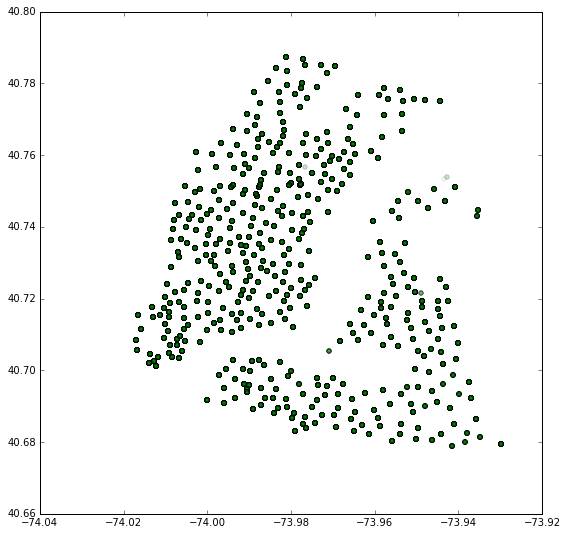

In [17]:
fig,ax = plt.subplots(figsize=(9,9))
ax.